<IPython.core.display.Javascript object>


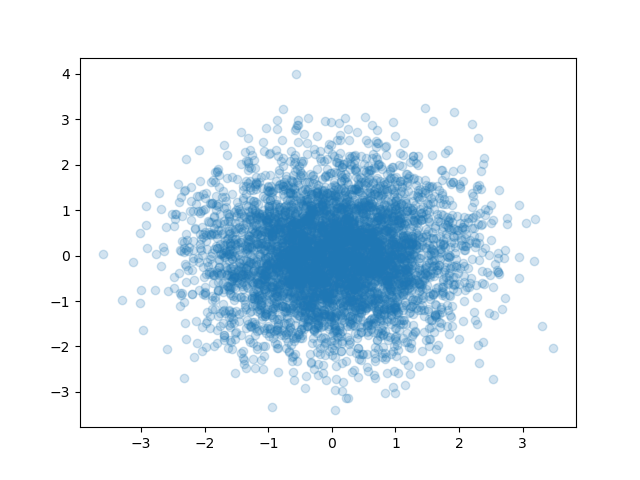

In [1]:
# 6 STOCK PORTFOLIO LINEAR REGRESSION
# Comparing correlation to linear regression, by quantifying the direction and strength of the
# relationship between two variables, in this case,stock prices.

# True random and correlated variables
# Visualise linear regression on a silicon chip portolfio of stocks

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook
X = np.random.randn(5000)
Y = np.random.randn(5000)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=.2)

# This shows two variables that are not correlated.

In [2]:
# Looking at the correlation in stocks in a portfolio that focuses on silicon chips

import pandas_datareader.data as pdr
import yfinance as yfin
yfin.pdr_override()

# To get around a breaking change in the yahoo finance API

tickers = ['NVDA', 'INTC', 'AMD', 'TSM', '^GSPC']
start = dt.datetime(2019, 1, 1)
data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  5 of 5 completed


In [3]:
data.head()

Adj Close                                                \
                  AMD       INTC       NVDA        TSM        ^GSPC   
Date                                                                  
2019-01-02  18.830000  41.513222  33.799736  32.560837  2510.030029   
2019-01-03  17.049999  39.229469  31.757652  30.635014  2447.889893   
2019-01-04  19.000000  41.636669  33.792282  31.178888  2531.939941   
2019-01-07  20.570000  41.830658  35.581272  31.410696  2549.689941   
2019-01-08  20.750000  42.095196  34.695465  31.152134  2574.409912   

                Close                                                ...  \
                  AMD       INTC       NVDA        TSM        ^GSPC  ...   
Date                                                                 ...   
2019-01-02  18.830000  47.080002  34.055000  36.520000  2510.030029  ...   
2019-01-03  17.049999  44.490002  31.997499  34.360001  2447.889893  ...   
2019-01-04  19.000000  47.220001  34.047501  34.970001  2531.939941  ...   
2019-01-07  20.570000  47.439999  35.849998  35.230000  2549.689941  ...   
2019-01-08  20.750000  47.740002  34.957500  34.939999  2574.409912  ...   

                 Open                                                \
                  AMD       INTC       NVDA        TSM        ^GSPC   
Date                                                                  
2019-01-02  18.010000  45.959999  32.660000  36.200001  2476.959961   
2019-01-03  18.420000  46.150002  33.447498  35.340000  2491.919922   
2019-01-04  17.549999  45.840000  32.735001  34.459999  2474.330078   
2019-01-07  19.440001  47.099998  34.625000  35.009998  2535.610107   
2019-01-08  21.190001  47.799999  36.672501  35.110001  2568.110107   

               Volume                                            
                  AMD      INTC      NVDA       TSM       ^GSPC  
Date                                                             
2019-01-02   87148700  18774600  50875200   5273100  3733160000  
2019-01-03  117277600  32267300  70555200  15998000  3858830000  
2019-01-04  111878600  35447300  58562000  14178200  4234140000  
2019-01-07  107157000  22736800  70916000   6850800  4133120000  
2019-01-08  121271000  22749200  78601600  11462600  4120060000  

[5 rows x 30 columns]

In [4]:
data = data['Adj Close']

In [5]:
data.head()

,AMD,INTC,NVDA,TSM,^GSPC
Date,,,,,
2019-01-02,18.830000,41.513222,33.799736,32.560837,2510.030029
2019-01-03,17.049999,39.229469,31.757652,30.635014,2447.889893
2019-01-04,19.000000,41.636669,33.792282,31.178888,2531.939941
2019-01-07,20.570000,41.830658,35.581272,31.410696,2549.689941
2019-01-08,20.750000,42.095196,34.695465,31.152134,2574.409912


In [6]:
log_returns = np.log(data/data.shift())

In [8]:
log_returns

,AMD,INTC,NVDA,TSM,^GSPC
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099301,-0.056584,-0.062319,-0.060967,-0.025068
2019-01-04,0.108289,0.059553,0.062099,0.017598,0.033759
2019-01-07,0.079395,0.004648,0.051587,0.007407,0.006986
2019-01-08,0.008713,0.006304,-0.025210,-0.008266,0.009649
...,...,...,...,...,...
2023-04-26,0.025216,0.005869,0.026883,-0.000486,-0.003849
2023-04-27,0.017303,0.027501,0.009967,0.017117,0.019377
2023-04-28,0.021832,0.039401,0.019027,0.007501,0.008219


In [11]:
# Converting the data and modulate it to see if there is a correlation
# AMD vs S&P500

ticker_a = 'AMD'
ticker_b = '^GSPC'

# The LinearRegression model does not work with data frames, so it needs to be converted to a NumPy array
# The first item of the list needs to removed, because it is not a number, and the NumPy array does not
# work with a value that is not a number (integere, i.e. int)
X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)

In [12]:
X

array([[-0.09930118],
       [ 0.10828882],
       [ 0.07939471],
       ...,
       [ 0.02183221],
       [ 0.00357422],
       [ 0.0024499 ]])

In [14]:
Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

In [15]:
Y

array([[-0.02506833],
       [ 0.0337594 ],
       [ 0.00698598],
       ...,
       [ 0.00821933],
       [-0.00038618],
       [-0.01165391]])

In [22]:
def linear_regression(ticker_a, ticker_b):
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)

    Y_pred = lin_regr.predict(X)

    # Calculating the coefficient
    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]

    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta; " + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

# This shows the correlation between AMD and the S&P500

<IPython.core.display.Javascript object>


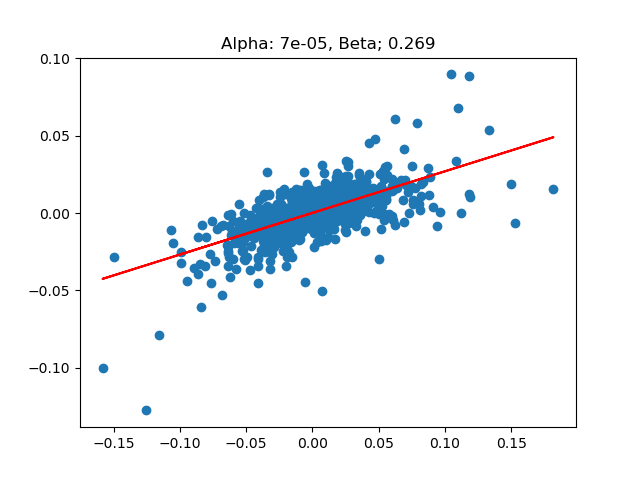

In [23]:
linear_regression("AMD", "^GSPC")

# alpha of 6.8 is the y intercept
# beta of 0.27 shows that when the AMD price goes up 1 unit percetnage, the S&P500 goes up 0.27 units of
# percentage change log return.
# The beta value is the slope ( the gradient)

# If there is a high correlation, the scatter plot is will be close to the line.

<IPython.core.display.Javascript object>


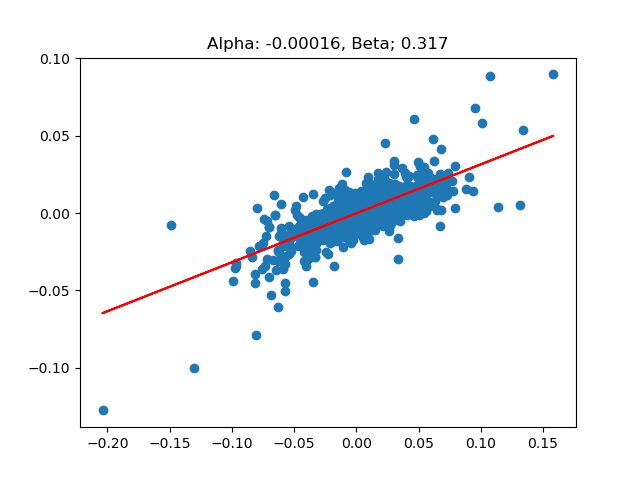

In [24]:
# Comparing correlations in the rest of the portfolio tickers = ['NVDA', 'INTC', 'AMD', 'TSM', '^GSPC']

linear_regression("NVDA", "^GSPC")

<IPython.core.display.Javascript object>


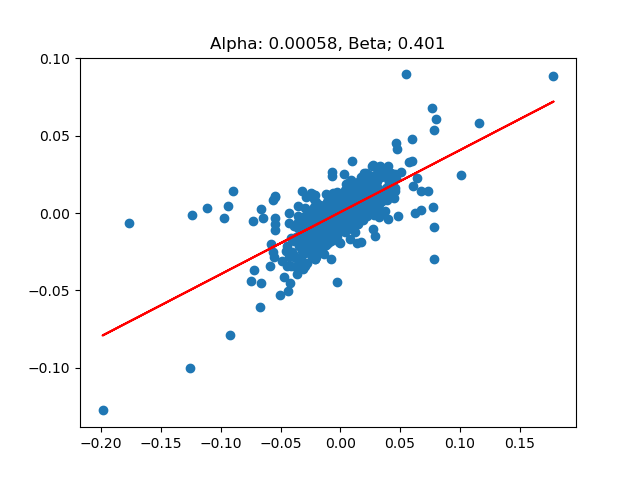

In [25]:
linear_regression("INTC", "^GSPC")

<IPython.core.display.Javascript object>


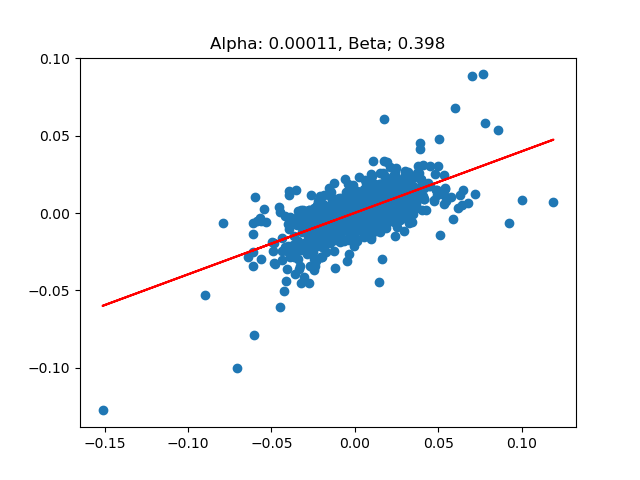

In [26]:
linear_regression("TSM", "^GSPC")

<IPython.core.display.Javascript object>


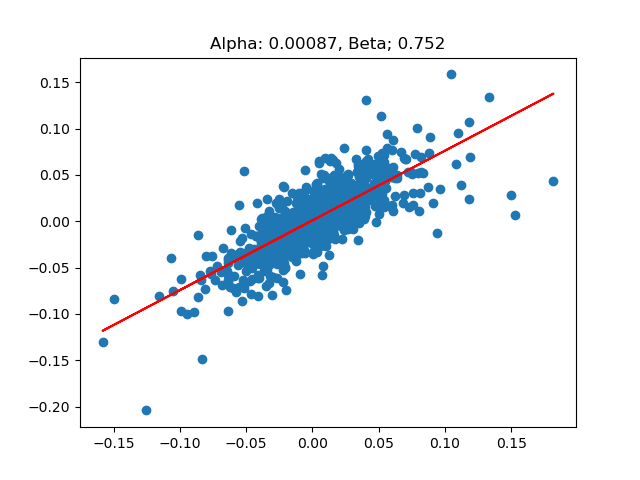

In [28]:
# Comparing 2 stocks

linear_regression("AMD", "NVDA")

<IPython.core.display.Javascript object>


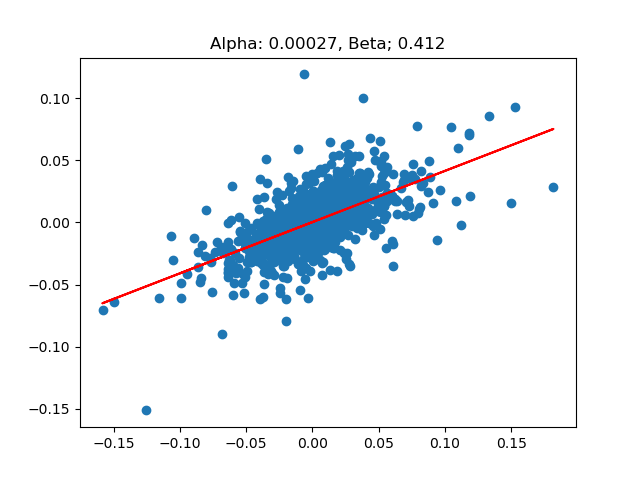

In [29]:
linear_regression("AMD", "TSM")